In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

For displaying all the rows and columns

In [2]:
pd.set_option('display.max.rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
pd.set_option('display.expand_frame_repr',False)

In [3]:
import os
os.chdir(r"D:\Data Analyst")
os.listdir()
bike_data = pd.read_csv("day - day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_data.shape

(730, 16)

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [9]:
bike_data.rename(columns={'dteday':'date_day','yr':'year','mnth':'month','hum':'humidity','cnt':'count'},inplace=True)

In [10]:
bike_data.head()

,instant,date_day,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Exploratory Data Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
new_cols = ['season','year','month','holiday','weekday','workingday','weathersit','temp','atemp','humidity','windspeed','count']
bike_data_1=bike_data[new_cols]
bike_data_1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


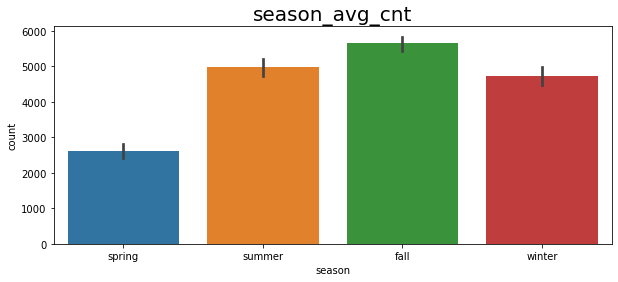

In [14]:
bike_data_1['season'] = bike_data_1['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
plt.figure(figsize=[10,4])
sns.barplot(bike_data_1['season'],bike_data_1['count'])
plt.title('season_avg_cnt',fontsize=20)
plt.show()

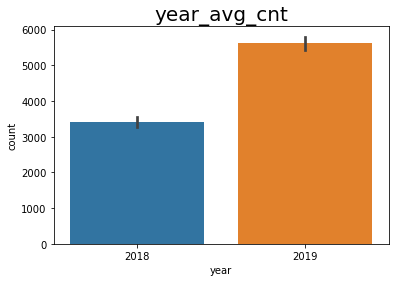

In [15]:
bike_data_1['year'] = bike_data_1['year'].map({0:'2018',1:'2019'})
sns.barplot(bike_data_1['year'],bike_data_1['count'])
plt.title('year_avg_cnt',fontsize=20)
plt.show()

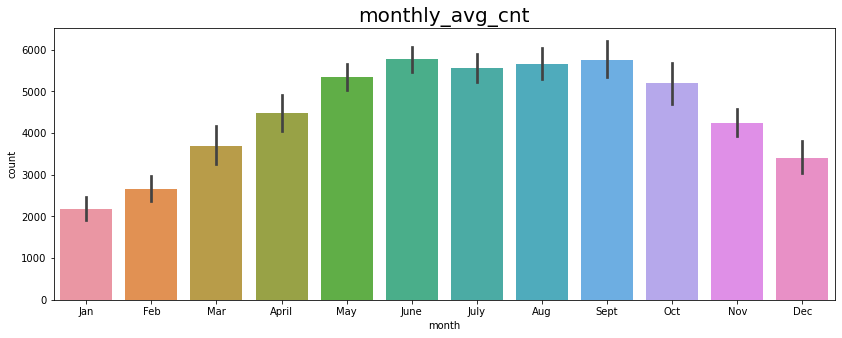

In [16]:
bike_data_1['month'] = bike_data_1['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',
                                       5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
plt.figure(figsize=[14,5])
sns.barplot(bike_data_1['month'],bike_data_1['count'])
plt.title('monthly_avg_cnt',fontsize=20)
plt.show()

* Similar average count on august, june, september, july also on may, october repectively.
* December, january, february have least demand because of winter season

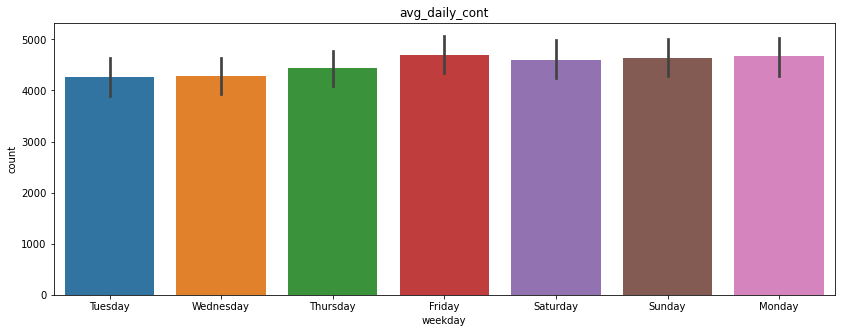

In [17]:
bike_data_1['weekday']=bike_data_1['weekday'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
plt.figure(figsize=[14,5])
sns.barplot(bike_data_1['weekday'],bike_data_1['count'])
plt.title('avg_daily_cont')
plt.show()

* Having higher demands on sunday, monday, saturday, friday 
* People also prefer thruday, wednesday, tuesday

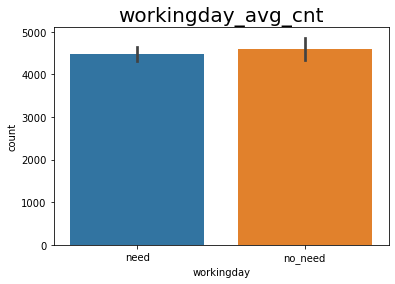

In [18]:
bike_data_1['workingday']=bike_data_1['workingday'].map({0:"no_need",1:"need"})
sns.barplot(bike_data_1['workingday'],bike_data_1['count'])
plt.title('workingday_avg_cnt',fontsize=20)
plt.show()

* Have similar demands

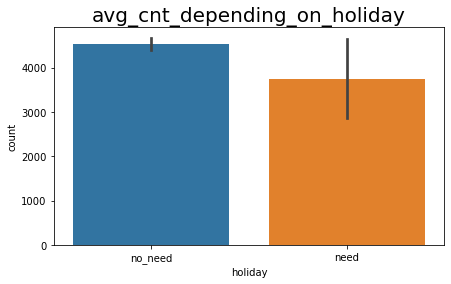

In [19]:
bike_data_1['holiday']=bike_data_1['holiday'].map({0:'no_need',1:"need"})
plt.figure(figsize=[7,4])
sns.barplot(bike_data_1['holiday'],bike_data_1['count'])
plt.title('avg_cnt_depending_on_holiday',fontsize=20)
plt.show()

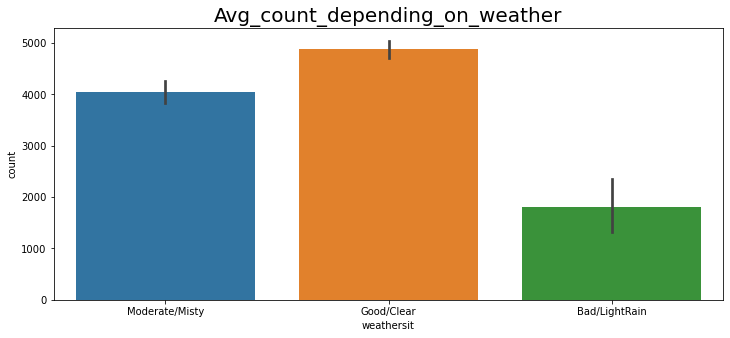

In [20]:
bike_data_1['weathersit'] = bike_data_1['weathersit'].map({1:"Good/Clear",2:'Moderate/Misty',3:'Bad/LightRain',4:'Worse/HeavyRain'})
plt.figure(figsize=[12,5])
sns.barplot(bike_data_1['weathersit'],bike_data_1['count'])
plt.title('Avg_count_depending_on_weather', fontsize = 20)
plt.show()

* When there is clear weather the demand is more

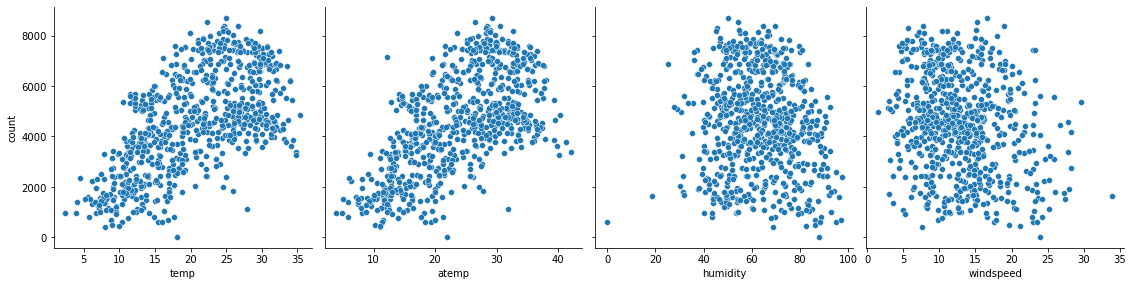

In [21]:
sns.pairplot(bike_data_1,x_vars=['temp','atemp','humidity','windspeed'],y_vars='count',size=4,aspect=1,
            kind='scatter',diag_kind=None)
plt.show()

Independent variables that are good predictor:
* temp
* weathersit
* month
* season
* workingday

In [22]:
bike_data_1.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'count'], dtype='object')

In [23]:
category = ['season','year','month','holiday','weekday','workingday','weathersit']

for i in category:
    bike_data_1[i] = bike_data_1[i].astype('category')

In [24]:
bike_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    category
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  count       730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


* Create dummies for linear model:

In [25]:
dummy_bike_data = pd.get_dummies(bike_data_1[category],drop_first=True)
dummy_bike_data.head()

,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sept,holiday_no_need,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_no_need,weathersit_Good/Clear,weathersit_Moderate/Misty
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [26]:
bike_data_2 = pd.concat([bike_data_1,dummy_bike_data],axis=1)
bike_data_2.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sept,holiday_no_need,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_no_need,weathersit_Good/Clear,weathersit_Moderate/Misty
0,spring,2018,Jan,no_need,Tuesday,need,Moderate/Misty,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,spring,2018,Jan,no_need,Wednesday,need,Moderate/Misty,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,spring,2018,Jan,no_need,Thursday,need,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,spring,2018,Jan,no_need,Friday,need,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,spring,2018,Jan,no_need,Saturday,need,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [27]:
bike_data_2.drop(category,axis=1,inplace=True)

In [28]:
bike_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   temp                       730 non-null    float64
 1   atemp                      730 non-null    float64
 2   humidity                   730 non-null    float64
 3   windspeed                  730 non-null    float64
 4   count                      730 non-null    int64  
 5   season_spring              730 non-null    uint8  
 6   season_summer              730 non-null    uint8  
 7   season_winter              730 non-null    uint8  
 8   year_2019                  730 non-null    uint8  
 9   month_Aug                  730 non-null    uint8  
 10  month_Dec                  730 non-null    uint8  
 11  month_Feb                  730 non-null    uint8  
 12  month_Jan                  730 non-null    uint8  
 13  month_July                 730 non-null    uint8  

# Train - Test Split Data

In [29]:
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [30]:
train_bike_data_2,test_bike_data_2 = train_test_split(bike_data_2, train_size=0.70, random_state=100)

In [31]:
print(train_bike_data_2.shape)
print(test_bike_data_2.shape)

(510, 30)
(220, 30)


# Rescaling the features

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
bike_data_2.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'count', 'season_spring', 'season_summer', 'season_winter', 'year_2019', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_July', 'month_June', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sept', 'holiday_no_need', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'workingday_no_need', 'weathersit_Good/Clear', 'weathersit_Moderate/Misty'], dtype='object')

In [36]:
numerical_variables = ['temp','atemp','humidity','windspeed','count']

train_bike_data_2[numerical_variables] = scaler.fit_transform(train_bike_data_2[numerical_variables])
train_bike_data_2[numerical_variables].head()

,temp,atemp,humidity,windspeed,count
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095


In [37]:
train_bike_data_2.describe()

,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sept,holiday_no_need,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_no_need,weathersit_Good/Clear,weathersit_Moderate/Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.974510,0.137255,0.147059,0.129412,0.135294,0.154902,0.152941,0.288235,0.625490,0.345098
std,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.157763,0.344454,0.354512,0.335985,0.342373,0.362166,0.360284,0.453386,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


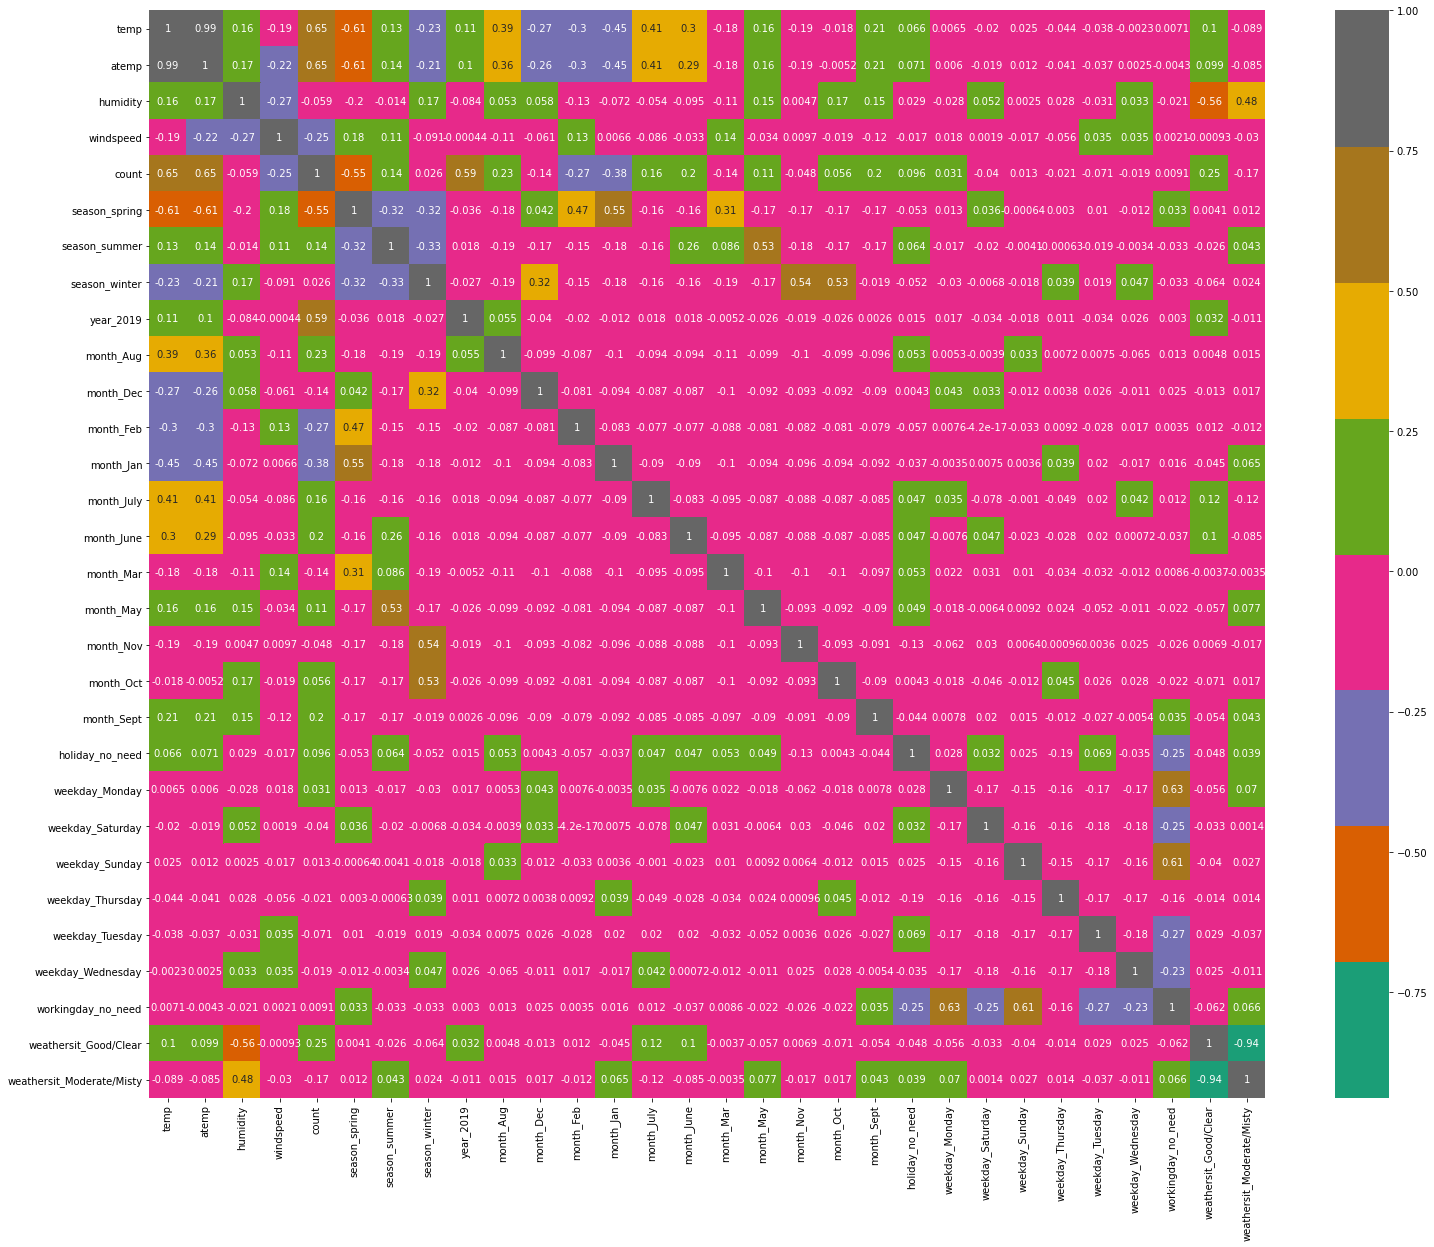

In [38]:
plt.figure(figsize=[25,20])
sns.heatmap(train_bike_data_2.corr(),annot=True,cmap="Dark2")
plt.show()

In [39]:
y_train = train_bike_data_2.pop("count")
X_train = train_bike_data_2

print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('year_2019', True, 1),
 ('month_Aug', False, 10),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 12),
 ('month_Mar', False, 15),
 ('month_May', False, 9),
 ('month_Nov', True, 1),
 ('month_Oct', False, 13),
 ('month_Sept', True, 1),
 ('holiday_no_need', True, 1),
 ('weekday_Monday', False, 6),
 ('weekday_Saturday', False, 14),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 7),
 ('workingday_no_need', False, 4),
 ('weathersit_Good/Clear', True, 1),
 ('weathersit_Moderate/Misty', True, 1)]

In [44]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['temp', 'humidity', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'year_2019', 'month_Dec', 'month_Jan', 'month_July', 'month_Nov', 'month_Sept', 'holiday_no_need', 'weathersit_Good/Clear', 'weathersit_Moderate/Misty'], dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['atemp', 'month_Aug', 'month_Feb', 'month_June', 'month_Mar', 'month_May', 'month_Oct', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'workingday_no_need'], dtype='object')

In [46]:
X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,month_Dec,month_Jan,month_July,month_Nov,month_Sept,holiday_no_need,weathersit_Good/Clear,weathersit_Moderate/Misty
576,0.815169,0.725633,0.264686,0,0,0,1,0,0,1,0,0,1,1,0
426,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,0,1,0,1
728,0.245101,0.498067,0.663106,1,0,0,1,1,0,0,0,0,1,1,0
482,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,0,1,0,1
111,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1,0,1


# Model_No._1

In [47]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_rfe)

lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          8.15e-189
Time:                        15:14:01   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0179      0.055     -0.328      0.743      -0.125       0.089
temp                          0.4815      0.037     13.005      0.000       0.409       0.554
humidity                     -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                    -0.1887      0.026     -7.315      0.000      -0.239      -0.138
season_spring                -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_summer                 0.0423      0.015      2.761      0.006       0.012       0.072
season_winter                 0.1019      0.018      5.656      0.000       0.067       0.137
year_2019                     0.2304      0.008     28.487      0.000       0.215       0.246
month_Dec                    -0.0355      0.018     -2.024      0.043      -0.070      -0.001
month_Jan                    -0.0434      0.018     -2.393      0.017      -0.079      -0.008
month_July                   -0.0553      0.018     -3.030      0.003      -0.091      -0.019
month_Nov                    -0.0387      0.019     -2.057      0.040      -0.076      -0.002
month_Sept                    0.0755      0.017      4.466      0.000       0.042       0.109
holiday_no_need               0.0911      0.026      3.557      0.000       0.041       0.141
weathersit_Good/Clear         0.2465      0.026      9.331      0.000       0.195       0.298
weathersit_Moderate/Misty     0.1922      0.025      7.687      0.000       0.143       0.241
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         32.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,holiday_no_need,30.64
1,humidity,29.59
0,temp,26.02
13,weathersit_Good/Clear,18.02
14,weathersit_Moderate/Misty,10.23
3,season_spring,5.93
2,windspeed,4.86
5,season_winter,4.65
4,season_summer,3.38
6,year_2019,2.10


# Model_No._2

* Removing feature humidity due to very high VIF values as all the p-values < 0.05

In [52]:
X_train_rfe2 = X_train_rfe.drop('humidity', axis=1)

X_train_lm2 = sm.add_constant(X_train_rfe2)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          4.75e-186
Time:                        15:19:55   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.1385      0.048     -2.906      0.004      -0.232      -0.045
temp                          0.4387      0.036     12.093      0.000       0.367       0.510
windspeed                    -0.1585      0.025     -6.276      0.000      -0.208      -0.109
season_spring                -0.0713      0.021     -3.314      0.001      -0.113      -0.029
season_summer                 0.0349      0.015      2.251      0.025       0.004       0.065
season_winter                 0.0869      0.018      4.831      0.000       0.052       0.122
year_2019                     0.2345      0.008     28.687      0.000       0.218       0.251
month_Dec                    -0.0428      0.018     -2.413      0.016      -0.078      -0.008
month_Jan                    -0.0500      0.018     -2.719      0.007      -0.086      -0.014
month_July                   -0.0500      0.019     -2.703      0.007      -0.086      -0.014
month_Nov                    -0.0395      0.019     -2.064      0.040      -0.077      -0.002
month_Sept                    0.0687      0.017      4.015      0.000       0.035       0.102
holiday_no_need               0.0918      0.026      3.522      0.000       0.041       0.143
weathersit_Good/Clear         0.2917      0.025     11.840      0.000       0.243       0.340
weathersit_Moderate/Misty     0.2117      0.025      8.462      0.000       0.163       0.261
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
11,holiday_no_need,27.26
0,temp,18.03
12,weathersit_Good/Clear,17.68
13,weathersit_Moderate/Misty,10.12
2,season_spring,5.03
1,windspeed,4.79
4,season_winter,3.83
3,season_summer,3.04
5,year_2019,2.08
9,month_Nov,1.86


# Model_No._3

* Removing Feature 'weathersit_Moderate/Mistry' due to very high VIF values as all the p-values < 0.05

In [57]:
X_train_rfe3 = X_train_rfe2.drop('weathersit_Moderate/Misty', axis = 1)

X_train_lm3 = sm.add_constant(X_train_rfe3)

lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     169.1
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          1.01e-172
Time:                        15:27:35   Log-Likelihood:                 470.40
No. Observations:                 510   AIC:                            -912.8
Df Residuals:                     496   BIC:                            -853.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0568      0.045      1.275      0.203      -0.031       0.144
temp                      0.4520      0.039     11.669      0.000       0.376       0.528
windspeed                -0.1798      0.027     -6.695      0.000      -0.233      -0.127
season_spring            -0.0662      0.023     -2.881      0.004      -0.111      -0.021
season_summer             0.0405      0.017      2.447      0.015       0.008       0.073
season_winter             0.0776      0.019      4.043      0.000       0.040       0.115
year_2019                 0.2380      0.009     27.280      0.000       0.221       0.255
month_Dec                -0.0317      0.019     -1.674      0.095      -0.069       0.005
month_Jan                -0.0410      0.020     -2.091      0.037      -0.080      -0.002
month_July               -0.0554      0.020     -2.802      0.005      -0.094      -0.017
month_Nov                -0.0296      0.020     -1.449      0.148      -0.070       0.011
month_Sept                0.0667      0.018      3.647      0.000       0.031       0.103
holiday_no_need           0.0874      0.028      3.139      0.002       0.033       0.142
weathersit_Good/Clear     0.0960      0.009     10.571      0.000       0.078       0.114
==============================================================================
Omnibus:                      101.079   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.095
Skew:                          -0.908   Prob(JB):                     1.55e-71
Kurtosis:                       6.471   Cond. No.                         25.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,holiday_no_need,23.76
0,temp,14.23
1,windspeed,4.79
2,season_spring,4.33
4,season_winter,3.66
3,season_summer,2.77
12,weathersit_Good/Clear,2.73
5,year_2019,2.07
9,month_Nov,1.80
7,month_Jan,1.70


# Model_No._4

* Removing feature 'month_nov' because high p-value(0.148)

In [59]:
X_train_rfe4 = X_train_rfe3.drop('month_Nov',axis=1)

X_train_lm4 = sm.add_constant(X_train_rfe4)

lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     182.6
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          2.07e-173
Time:                        15:32:03   Log-Likelihood:                 469.32
No. Observations:                 510   AIC:                            -912.6
Df Residuals:                     497   BIC:                            -857.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0401      0.043      0.931      0.352      -0.045       0.125
temp                      0.4664      0.037     12.446      0.000       0.393       0.540
windspeed                -0.1802      0.027     -6.703      0.000      -0.233      -0.127
season_spring            -0.0602      0.023     -2.661      0.008      -0.105      -0.016
season_summer             0.0446      0.016      2.729      0.007       0.012       0.077
season_winter             0.0706      0.019      3.796      0.000       0.034       0.107
year_2019                 0.2378      0.009     27.233      0.000       0.221       0.255
month_Dec                -0.0209      0.017     -1.199      0.231      -0.055       0.013
month_Jan                -0.0375      0.019     -1.922      0.055      -0.076       0.001
month_July               -0.0552      0.020     -2.790      0.005      -0.094      -0.016
month_Sept                0.0708      0.018      3.916      0.000       0.035       0.106
holiday_no_need           0.0923      0.028      3.334      0.001       0.038       0.147
weathersit_Good/Clear     0.0953      0.009     10.494      0.000       0.077       0.113
==============================================================================
Omnibus:                       94.595   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.484
Skew:                          -0.868   Prob(JB):                     3.75e-63
Kurtosis:                       6.242   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,holiday_no_need,23.68
0,temp,14.05
1,windspeed,4.76
2,season_spring,4.33
4,season_winter,2.90
3,season_summer,2.76
11,weathersit_Good/Clear,2.71
5,year_2019,2.07
7,month_Jan,1.70
8,month_July,1.60


# Model_No._5

* Removing feature 'month_dec' because of high p-value(0.231)

In [62]:
X_train_rfe5 = X_train_rfe4.drop('month_Dec', axis = 1)

X_train_lm5 = sm.add_constant(X_train_rfe5)

lr5 = sm.OLS(y_train, X_train_lm5).fit()

lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     198.9
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          2.93e-174
Time:                        15:33:48   Log-Likelihood:                 468.59
No. Observations:                 510   AIC:                            -913.2
Df Residuals:                     498   BIC:                            -862.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0318      0.043      0.747      0.455      -0.052       0.115
temp                      0.4767      0.036     13.062      0.000       0.405       0.548
windspeed                -0.1767      0.027     -6.610      0.000      -0.229      -0.124
season_spring            -0.0591      0.023     -2.614      0.009      -0.104      -0.015
season_summer             0.0468      0.016      2.880      0.004       0.015       0.079
season_winter             0.0693      0.019      3.733      0.000       0.033       0.106
year_2019                 0.2378      0.009     27.218      0.000       0.221       0.255
month_Jan                -0.0324      0.019     -1.704      0.089      -0.070       0.005
month_July               -0.0555      0.020     -2.804      0.005      -0.094      -0.017
month_Sept                0.0725      0.018      4.018      0.000       0.037       0.108
holiday_no_need           0.0913      0.028      3.298      0.001       0.037       0.146
weathersit_Good/Clear     0.0951      0.009     10.472      0.000       0.077       0.113
==============================================================================
Omnibus:                       92.324   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.195
Skew:                          -0.854   Prob(JB):                     1.75e-60
Kurtosis:                       6.168   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,holiday_no_need,22.95
0,temp,13.67
1,windspeed,4.74
2,season_spring,4.31
4,season_winter,2.79
3,season_summer,2.76
10,weathersit_Good/Clear,2.70
5,year_2019,2.07
6,month_Jan,1.64
7,month_July,1.60


# Model_No._6

 * Removing feature 'month_Jan' because of high p-values(0.089)

In [64]:
X_train_rfe6 = X_train_rfe5.drop('month_Jan', axis = 1)

X_train_lm6 = sm.add_constant(X_train_rfe6)

lr6 = sm.OLS(y_train, X_train_lm6).fit()

lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     217.6
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          8.19e-175
Time:                        15:35:39   Log-Likelihood:                 467.10
No. Observations:                 510   AIC:                            -912.2
Df Residuals:                     499   BIC:                            -865.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0169      0.042      0.406      0.685      -0.065       0.099
temp                      0.4927      0.035     13.944      0.000       0.423       0.562
windspeed                -0.1706      0.027     -6.427      0.000      -0.223      -0.118
season_spring            -0.0638      0.022     -2.836      0.005      -0.108      -0.020
season_summer             0.0494      0.016      3.048      0.002       0.018       0.081
season_winter             0.0745      0.018      4.063      0.000       0.038       0.111
year_2019                 0.2372      0.009     27.118      0.000       0.220       0.254
month_July               -0.0569      0.020     -2.872      0.004      -0.096      -0.018
month_Sept                0.0729      0.018      4.033      0.000       0.037       0.108
holiday_no_need           0.0919      0.028      3.315      0.001       0.037       0.146
weathersit_Good/Clear     0.0957      0.009     10.529      0.000       0.078       0.114
==============================================================================
Omnibus:                       91.943   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.468
Skew:                          -0.850   Prob(JB):                     2.51e-60
Kurtosis:                       6.166   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,holiday_no_need,22.35
0,temp,13.29
1,windspeed,4.70
2,season_spring,3.90
4,season_winter,2.78
3,season_summer,2.76
9,weathersit_Good/Clear,2.70
5,year_2019,2.07
6,month_July,1.59
7,month_Sept,1.34


# Model_No._7

* Removing feature 'month_July' because of high collinearity with temp variable

In [67]:
X_train_rfe7 = X_train_rfe6.drop('month_July', axis = 1)

X_train_lm7 = sm.add_constant(X_train_rfe7)

lr7 = sm.OLS(y_train, X_train_lm7).fit()

lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     237.5
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          3.04e-174
Time:                        15:37:59   Log-Likelihood:                 462.92
No. Observations:                 510   AIC:                            -905.8
Df Residuals:                     500   BIC:                            -863.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0103      0.042      0.246      0.806      -0.072       0.093
temp                      0.4782      0.035     13.576      0.000       0.409       0.547
windspeed                -0.1711      0.027     -6.398      0.000      -0.224      -0.119
season_spring            -0.0509      0.022     -2.292      0.022      -0.094      -0.007
season_summer             0.0665      0.015      4.382      0.000       0.037       0.096
season_winter             0.0884      0.018      4.958      0.000       0.053       0.123
year_2019                 0.2378      0.009     27.008      0.000       0.221       0.255
month_Sept                0.0884      0.017      5.083      0.000       0.054       0.123
holiday_no_need           0.0906      0.028      3.245      0.001       0.036       0.145
weathersit_Good/Clear     0.0944      0.009     10.318      0.000       0.076       0.112
==============================================================================
Omnibus:                       94.652   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.230
Skew:                          -0.883   Prob(JB):                     1.04e-60
Kurtosis:                       6.144   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,holiday_no_need,22.24
0,temp,12.57
1,windspeed,4.70
2,season_spring,3.72
8,weathersit_Good/Clear,2.69
4,season_winter,2.55
3,season_summer,2.35
5,year_2019,2.06
6,month_Sept,1.22


# Model_No._8

* Removing feature 'season_spring' because of high negative collinarity with temp variable

In [71]:
X_train_rfe8 = X_train_rfe7.drop('season_spring', axis = 1)

X_train_lm8 = sm.add_constant(X_train_rfe8)

lr8 = sm.OLS(y_train, X_train_lm8).fit()

lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     264.2
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          2.45e-174
Time:                        15:41:12   Log-Likelihood:                 460.26
No. Observations:                 510   AIC:                            -902.5
Df Residuals:                     501   BIC:                            -864.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0511      0.032     -1.576      0.116      -0.115       0.013
temp                      0.5428      0.021     25.540      0.000       0.501       0.585
windspeed                -0.1756      0.027     -6.559      0.000      -0.228      -0.123
season_summer             0.0903      0.011      8.152      0.000       0.069       0.112
season_winter             0.1205      0.011     10.863      0.000       0.099       0.142
year_2019                 0.2366      0.009     26.806      0.000       0.219       0.254
month_Sept                0.0978      0.017      5.761      0.000       0.064       0.131
holiday_no_need           0.0928      0.028      3.312      0.001       0.038       0.148
weathersit_Good/Clear     0.0939      0.009     10.226      0.000       0.076       0.112
==============================================================================
Omnibus:                       88.063   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.486
Skew:                          -0.853   Prob(JB):                     1.21e-51
Kurtosis:                       5.851   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,holiday_no_need,12.01
0,temp,7.18
1,windspeed,4.31
7,weathersit_Good/Clear,2.64
4,year_2019,2.04
2,season_summer,1.58
3,season_winter,1.49
5,month_Sept,1.20


# Validate Assumptions

In [73]:
y_train_pred = lr8.predict(X_train_lm8)

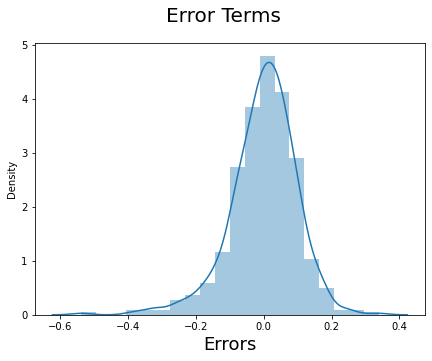

In [74]:
#residual calculations:
#--------------------------

res = y_train - y_train_pred

fig = plt.figure(figsize=[7,5])
sns.distplot((res),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

* Therefore the residuals are normally distributed.
* Our assumption for Linear Regression is valid

# Check Homoscedasticity

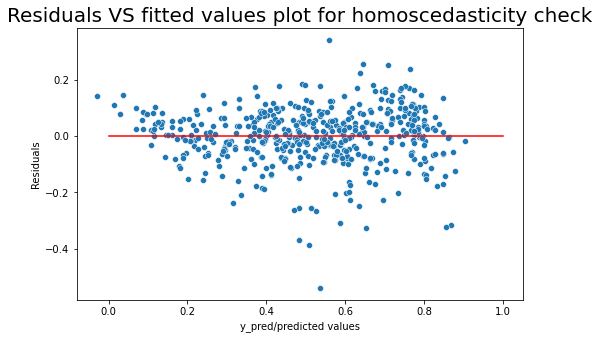

In [75]:
plt.figure(figsize=[8,5])
p = sns.scatterplot(y_train_pred,res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals VS fitted values plot for homoscedasticity check',fontsize=20)

# Making Prediction Using Final Model

In [79]:
test_bike_data_2[numerical_variables] = scaler.transform(test_bike_data_2[numerical_variables])
test_bike_data_2.head()

,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sept,holiday_no_need,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_no_need,weathersit_Good/Clear,weathersit_Moderate/Misty
184,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
535,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
299,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1
221,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
152,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0


In [80]:
test_bike_data_2.describe()

,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sept,holiday_no_need,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_no_need,weathersit_Good/Clear,weathersit_Moderate/Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.481818,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.963636,0.154545,0.131818,0.172727,0.159091,0.118182,0.122727,0.359091,0.654545,0.318182
std,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.500809,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.187620,0.362295,0.339064,0.378873,0.366595,0.323559,0.328872,0.480828,0.476601,0.466833
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
y_test = test_bike_data_2.pop('count')
X_test = test_bike_data_2

print(y_test.shape)
print(X_test.shape)

(220,)
(220, 29)


In [82]:
col_test = X_train_rfe8.columns

X_test = X_test[col_test]

X_test_lm8 = sm.add_constant(X_test)

X_test_lm8.head()

,const,temp,windspeed,season_summer,season_winter,year_2019,month_Sept,holiday_no_need,weathersit_Good/Clear
184,1.0,0.831783,0.084219,0,0,0,0,0,0
535,1.0,0.901354,0.153728,1,0,1,0,1,1
299,1.0,0.511964,0.334206,0,1,0,0,1,0
221,1.0,0.881625,0.339570,0,0,0,0,1,1
152,1.0,0.817246,0.537414,1,0,0,0,1,1


In [83]:
y_test_pred = lr8.predict(X_test_lm8)

# Model Evaluation

Text(0, 0.5, 'y_test_pred')

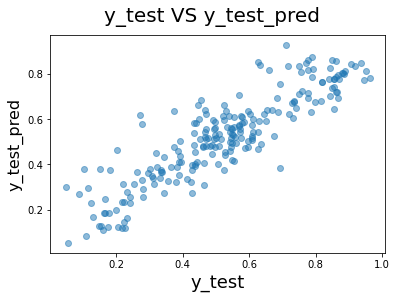

In [85]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test VS y_test_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_test_pred',fontsize=16)

* We do have linear relationship between y_test and y_test_pred

# Residual Analysis

In [86]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 78.32
Train data r^2 : 80.84


# Adjusted R^2 Value for TEST

In [87]:
# n for test data ,n1 for train data is number of rows
n = X_test.shape[0]
n1 = X_train_rfe8.shape[0]

# Number of features (predictors, p for test data, p1 for train data) is the number of columns
p = X_test.shape[1]
p1 = X_train_rfe8.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 77.5
Train data adjusted r^2 : 80.53


# Final Result

*Test data r^2 : 78.32

*Train data r^2 : 80.84

*Test data adjusted r^2 : 77.5

*Train data adjusted r^2 : 80.53

# Below predictor variables influences bike booking:

* Temp
* September month
* year 2019
* Summer Season
* Holiday
* Weather is clear/Good
* Wind_Speed

# *** Thank You ***